In [ ]:
# importing libraries
import pandas as pd

In [ ]:
# Load dataset
df = pd.read_csv('tweets_dataset.csv')

In [ ]:
# Prepare a list to store cleaned and structured data
structured_rows = []

# Iterate each row in the dataset
for index, row in df.iterrows():
    tweets = str(row['Tweets']).split('\n') # Treat the Tweet cell as a string and split by line breaks

    tweet = ' '.join(tweet.strip() for tweet in tweets if tweet.strip())  # Join all lines into a single sentence, removing extra spaces

  # Append the cleaned row
    structured_rows.append({
        'Date': row['Date'],
        'closing_price': row['closing_price'],
        'adj_close_price': row['adj_close_price'],
        'Tweet': tweet
    })

In [ ]:
# Convert to a new DataFrame
structured_df = pd.DataFrame(structured_rows)

# Save the structured dataset to a new CSV file
structured_df.to_csv('structured_tweets_dataset.csv', index=False)
structured_df.head(15)

,Date,closing_price,adj_close_price,Tweet
0,2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
1,2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2,2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
3,2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
4,2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
5,2007-01-06,12406.503255,12406.503255,. A Status Quo Secretary General. Best Buy and...
6,2007-01-07,12414.996745,12414.996745,. THE COMMON APPLICATION; Typo.com. Jumbo Bonu...
7,2007-01-08,12423.490234,12423.490234,. VW Group’s Sales Rose Sharply in 2006. Conso...
8,2007-01-09,12416.599609,12416.599609,. The Claim: Hot Leftovers Should Cool at Roo...
9,2007-01-10,12442.160156,12442.160156,. Love Among the Ruins. Dell Says Plant a Tree...


In [ ]:
# print no of rows and columns
structured_df.shape

(3653, 4)

In [ ]:
structured_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             3653 non-null   object 
 1   closing_price    3653 non-null   float64
 2   adj_close_price  3653 non-null   float64
 3   Tweet            3653 non-null   object 
dtypes: float64(2), object(2)
memory usage: 114.3+ KB


In [ ]:
structured_df.describe()

,closing_price,adj_close_price
count,3653.000000,3653.000000
mean,13618.122298,13618.122298
std,3044.526618,3044.526618
min,6547.049805,6547.049805
25%,11412.870117,11412.870117
50%,13093.169922,13093.169922
75%,16453.830078,16453.830078
max,19974.619141,19974.619141


In [ ]:
structured_df.isnull().sum()

,0
Date,0
closing_price,0
adj_close_price,0
Tweet,0


In [ ]:
# Convert 'Date' to datetime format
structured_df['Date'] = pd.to_datetime(structured_df['Date'])

In [ ]:
# Extract day, month, and year from 'Date'
structured_df['Day'] = structured_df['Date'].dt.day
structured_df['Month'] = structured_df['Date'].dt.month
structured_df['Year'] = structured_df['Date'].dt.year

In [ ]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

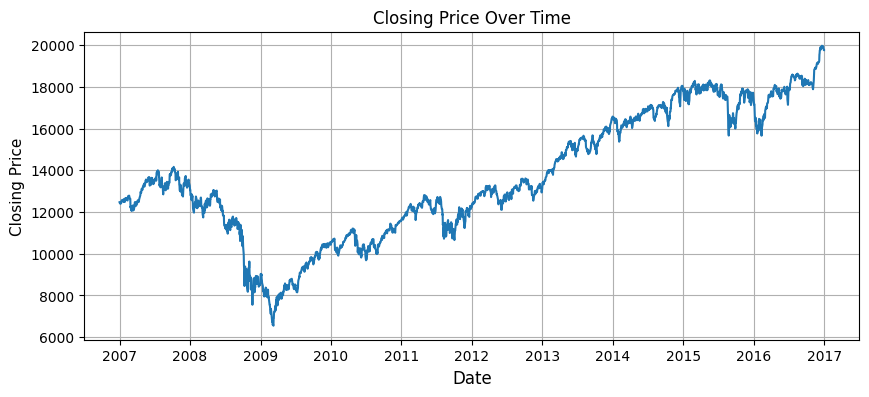

In [ ]:
# Plot closing price over time
plt.figure(figsize=(10, 4))
sns.lineplot(data=structured_df, x='Date', y='closing_price')
plt.title('Closing Price Over Time')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize =11)
plt.grid(True)
plt.show()

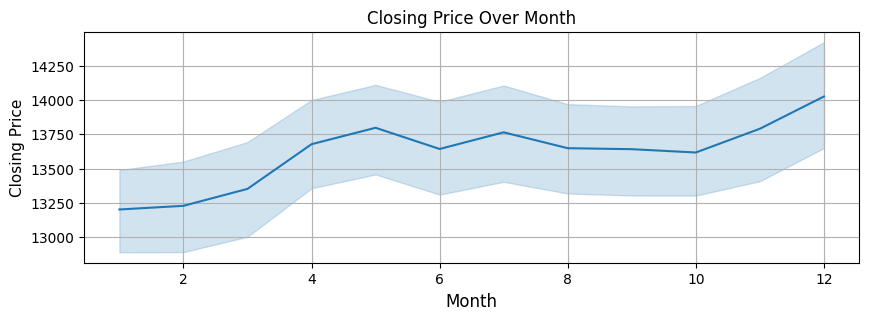

In [ ]:
# Plot closing price over month
plt.figure(figsize=(10, 3))
sns.lineplot(data=structured_df, x='Month', y='closing_price')
plt.title('Closing Price Over Month')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Closing Price', fontsize =11)
plt.grid(True)
plt.show()

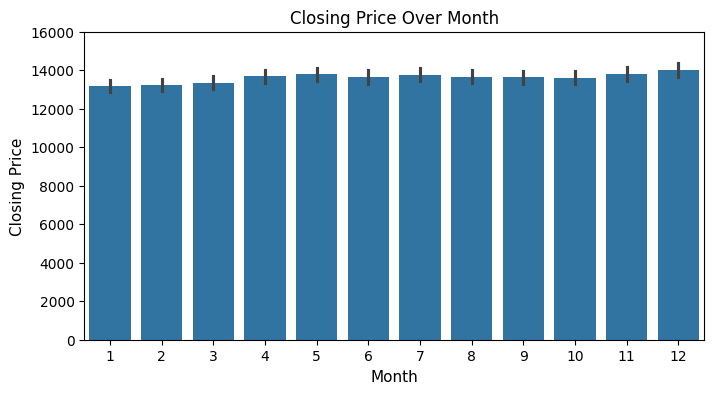

In [ ]:
# Plot closing price over month
plt.figure(figsize=(8, 4))
sns.barplot(data=structured_df, x='Month', y='closing_price')
plt.title('Closing Price Over Month')
plt.xlabel('Month', fontsize=11)
plt.ylabel('Closing Price', fontsize =11)
plt.ylim(0, 16000)
plt.show()

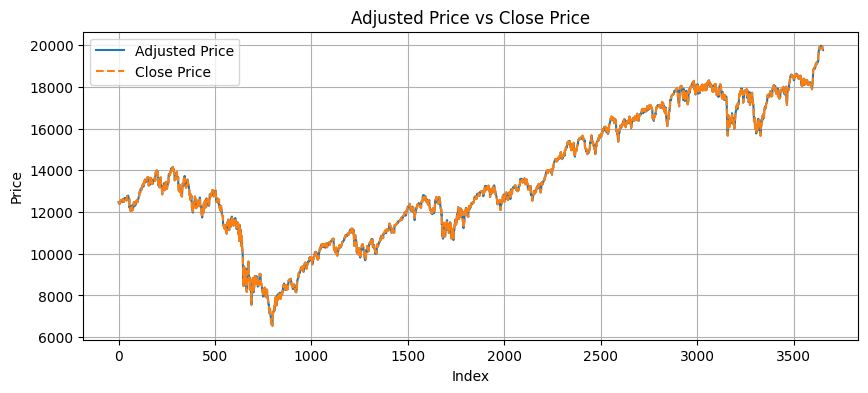

In [ ]:
# Adjusted price vs closing price
plt.figure(figsize=(10,4))
plt.plot(structured_df['adj_close_price'], label='Adjusted Price')
plt.plot(structured_df['closing_price'], label='Close Price', linestyle='--')
plt.title('Adjusted Price vs Close Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# define a column for tweet length
structured_df['Tweet_Length'] = structured_df['Tweet'].apply(len)

In [ ]:
structured_df.head()

,Date,closing_price,adj_close_price,Tweet,Day,Month,Year,Tweet_Length
0,2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...,1,1,2007,2423
1,2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...,2,1,2007,4823
2,2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...,3,1,2007,5292
3,2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...,4,1,2007,6278
4,2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...,5,1,2007,6123


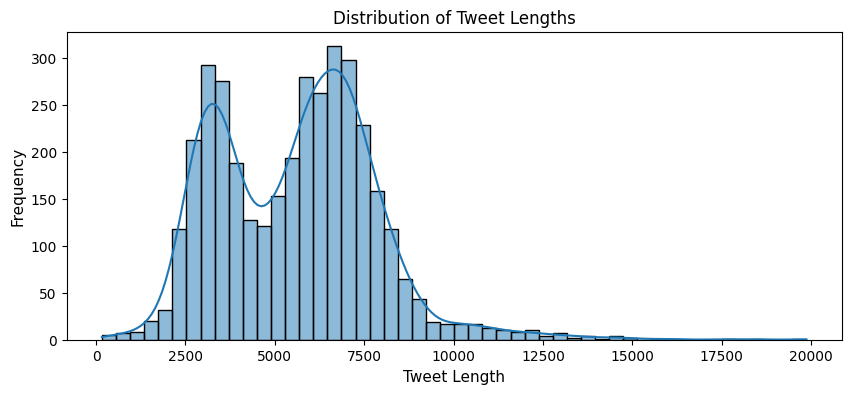

In [ ]:
# Plot distribution of tweet length
plt.figure(figsize=(10, 4))
sns.histplot(structured_df['Tweet_Length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length', fontsize =11)
plt.ylabel('Frequency', fontsize =11)
plt.show()

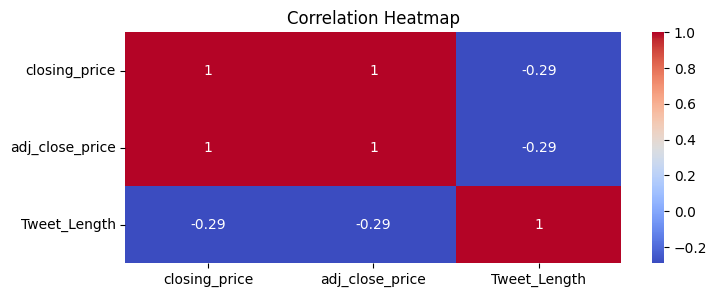

In [ ]:
# define correalation matrix
correlation_matrix = structured_df[['closing_price', 'adj_close_price', 'Tweet_Length']].corr()

# Correlation heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# importing libraries
import re
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
# Text preprocessing
def preprocess_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)  # Remove URLs
    tweet = re.sub(r'\@w+|\#','', tweet)  # Remove mentions and hashtags
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)  # Remove punctuation
    tweet = tweet.lower()  # Lowercase
    tokens = tweet.split()
    tokens = [token for token in tokens if token not in stop_words]
    return " ".join(tokens)

structured_df['cleaned_tweet'] = structured_df['Tweet'].astype(str).apply(preprocess_tweet)

In [ ]:
# Tokenization
structured_df['tokens'] = structured_df['cleaned_tweet'].apply(word_tokenize)

In [ ]:
total_tokens = structured_df['tokens'].apply(len).sum()
print(f"Total number of tokens: {total_tokens}")

Total number of tokens: 2293230


In [ ]:
# Stemming --
stemmer = PorterStemmer()
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]
structured_df['stemmed_tokens'] = structured_df['tokens'].apply(stem_tokens)

In [ ]:
total_stemmed_words = structured_df['stemmed_tokens'].apply(len).sum()
print(f"Total number of stemmed words: {total_stemmed_words}")

Total number of stemmed words: 2293230


In [ ]:
# Lemmatization --
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]
structured_df['lemmatized_tokens'] = structured_df['tokens'].apply(lemmatize_tokens)

In [ ]:
total_lemmatized_words = structured_df['lemmatized_tokens'].apply(len).sum()
print(f"Total number of lemmatized words: {total_lemmatized_words}")

Total number of lemmatized words: 2293230


In [ ]:
# Create corpus
corpus = structured_df['cleaned_tweet'].tolist()

print("\nFirst 5 elements of the corpus:")
print(corpus[:5])


First 5 elements of the corpus:
['sticks somalia orders islamists turn weapons tehran radio lets critics vent irans nuclear plans romania bulgaria join european union two believed dead madrid airport bombing edges order less shoplifting health beauty aisle sea book read author bombs bangkok kill wound century later los angeles atones water sins nonrenewal tv license stokes debate venezuela hope fresh start share grandmas birthday music animation new middle stance emerges debate climate pilots search lost travelers colorado snow heads east renovations set official residence un chief cant unpack yet environmental harmony deaths iraq countless tears home sleepy subject canadas grain exports perks marsh mclennan sell putnam funds canadian group chief justice advocates higher pay judiciary states take lead ethics rules lawmakers us questioned iraq rush hang hussein songwriters death leads suits preacher department household security another last chance change life russiabelarus gas deal av

In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000)
tfidf = vectorizer.fit_transform(structured_df['cleaned_tweet'])

In [ ]:
tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 808662 stored elements and shape (3653, 1000)>

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(tweet):
    scores = analyzer.polarity_scores(tweet)
    return scores['compound']  # Use compound score for overall sentiment

# Apply sentiment analysis to 'cleaned_tweet' column
structured_df['sentiment_score'] = structured_df['cleaned_tweet'].apply(get_sentiment_scores)

In [ ]:
# Categorize sentiment scores into labels
structured_df['sentiment_label'] = pd.cut(structured_df['sentiment_score'],
                                           bins=[-1, -0.05, 0.05, 1],
                                           labels=['negative', 'neutral', 'positive'])

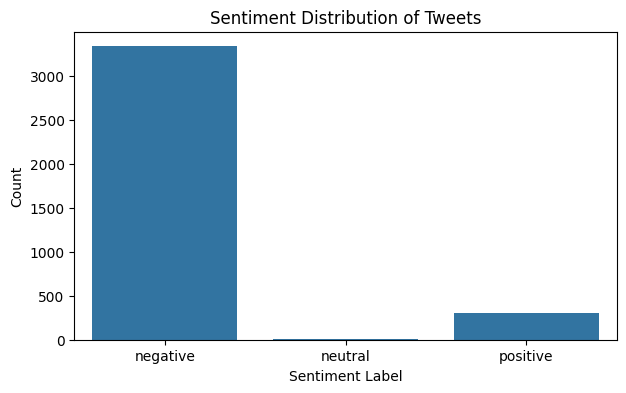

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Sentiment distribution
plt.figure(figsize=(7, 4))
sns.countplot(x='sentiment_label', data=structured_df )
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

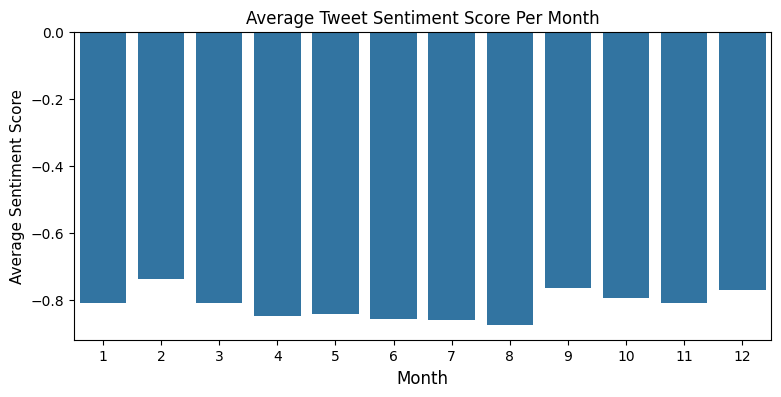

In [ ]:
monthly_sentiment = structured_df.groupby('Month')['sentiment_score'].mean().reset_index()

# Plot monthly average sentiment
plt.figure(figsize=(9, 4))
sns.barplot(data=monthly_sentiment, x='Month', y='sentiment_score')
plt.title('Average Tweet Sentiment Score Per Month')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=11)
plt.show()

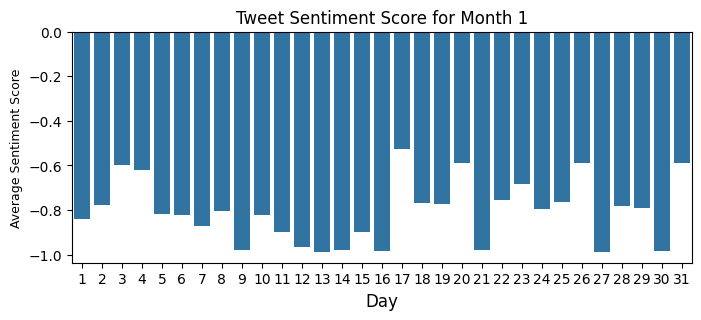

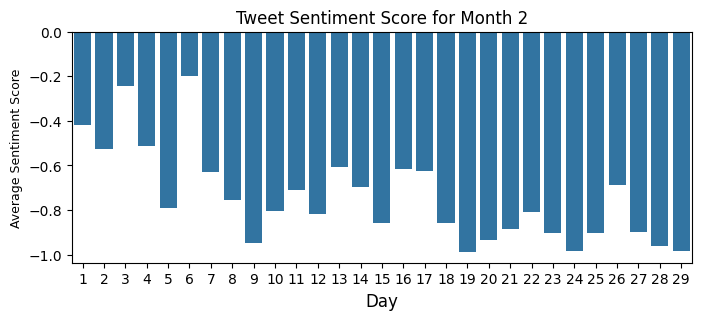

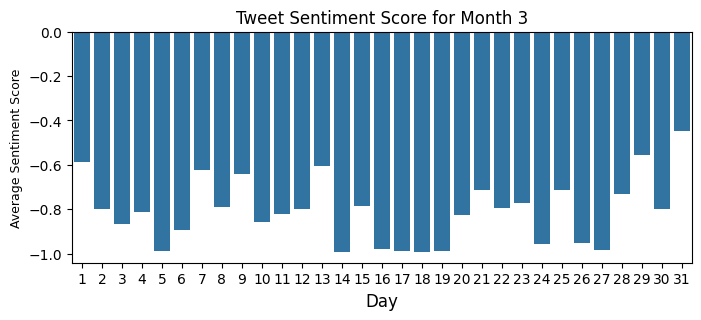

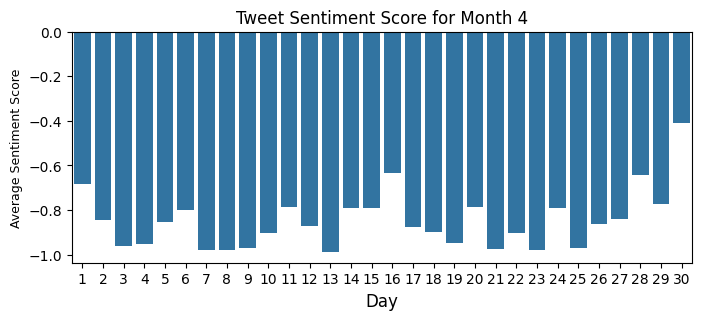

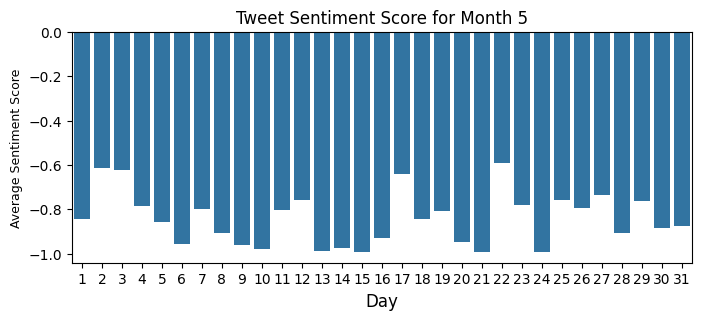

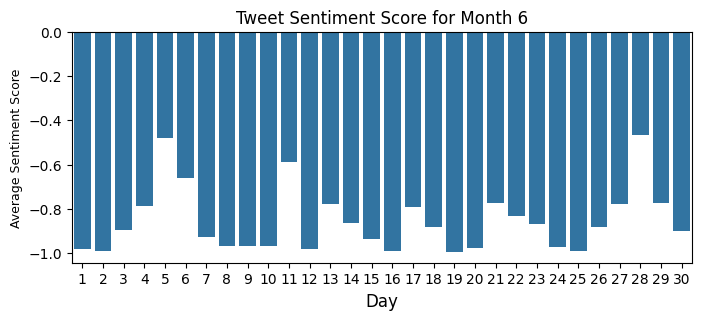

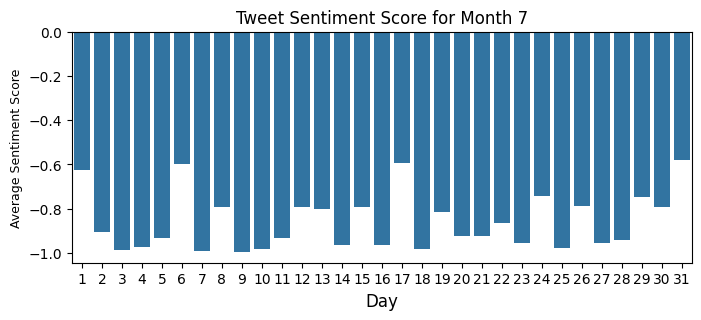

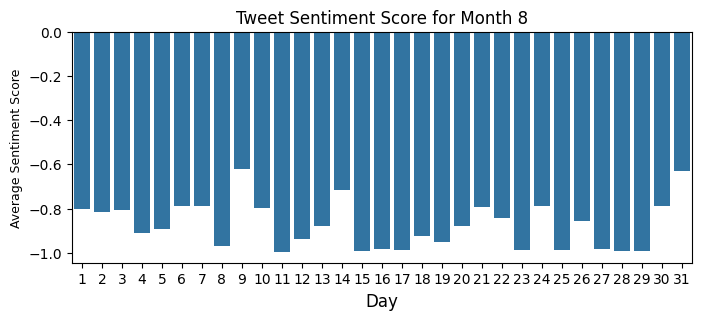

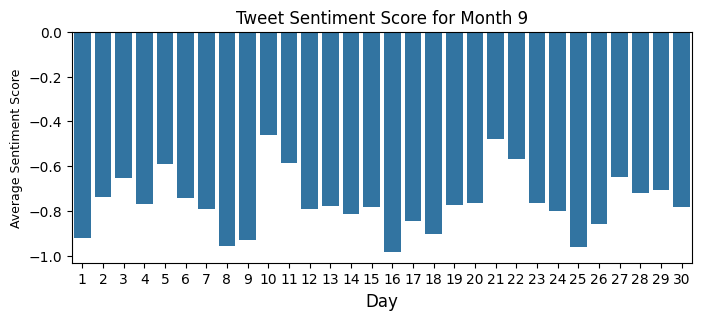

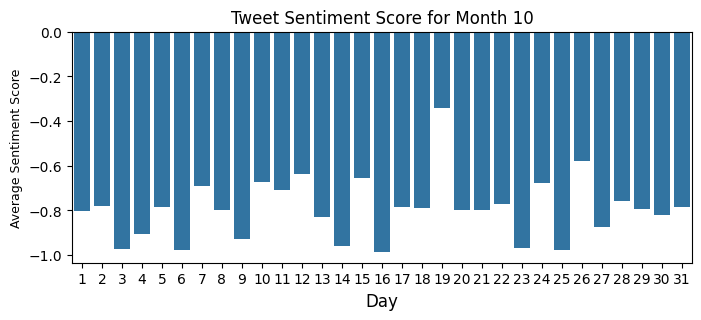

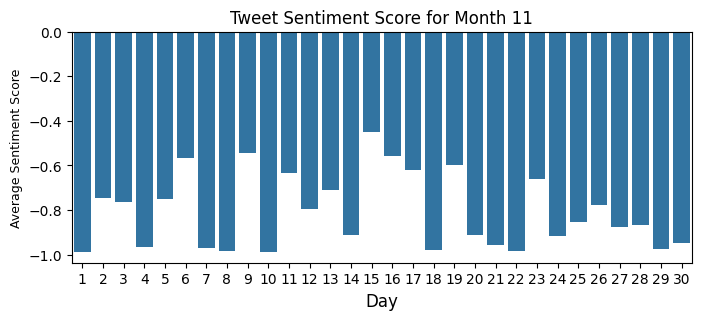

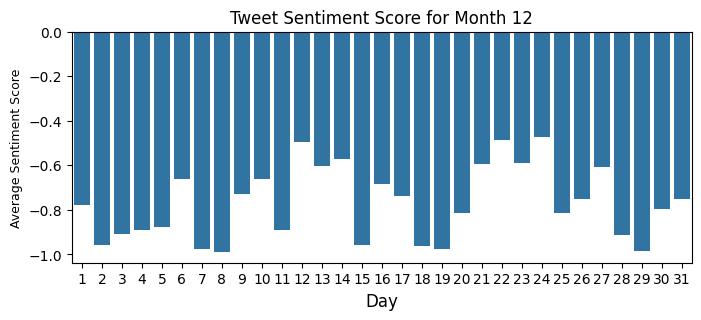

In [ ]:
daily_sentiment_per_month = structured_df.groupby(['Month', 'Day'])['sentiment_score'].mean().reset_index()

# Plot daily average sentiment for each month
for month in daily_sentiment_per_month['Month'].unique():
    month_data = daily_sentiment_per_month[daily_sentiment_per_month['Month'] == month]
    plt.figure(figsize=(8,3))
    sns.barplot(data=month_data, x='Day', y='sentiment_score')
    plt.title(f'Tweet Sentiment Score for Month {month}')
    plt.xlabel('Day', fontsize=12)
    plt.ylabel('Average Sentiment Score', fontsize=9)
    # plt.grid(True)
    plt.show()

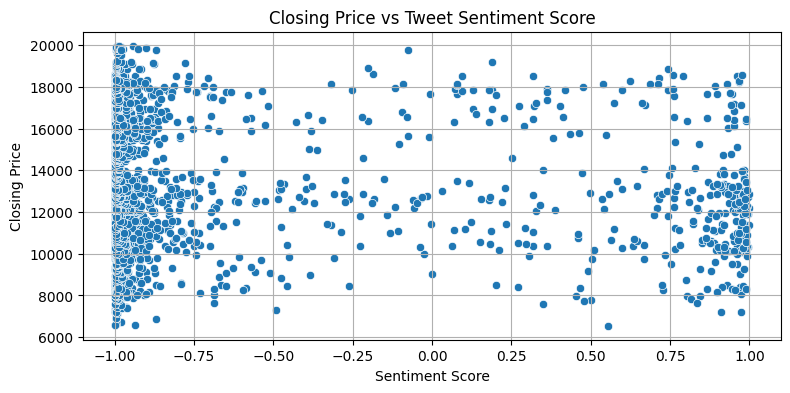

In [ ]:
#Create a scatter plot of sentiment score vs. closing price
plt.figure(figsize=(9,4))
sns.scatterplot(data=structured_df, x='sentiment_score', y='closing_price')
plt.title('Closing Price vs Tweet Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

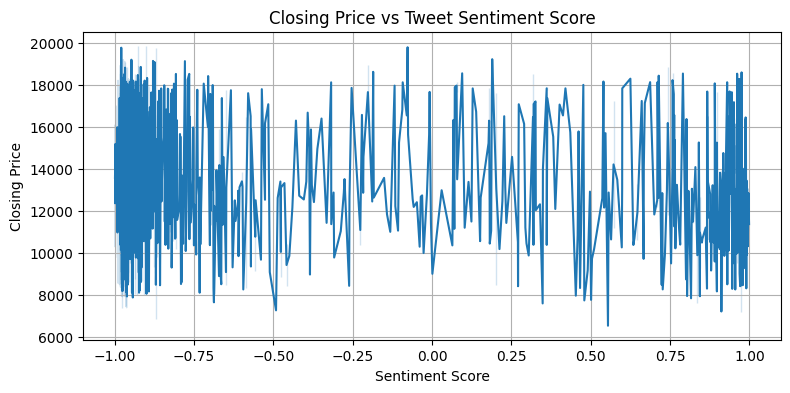

In [ ]:
#Create a scatter plot of sentiment score vs. closing price
plt.figure(figsize=(9,4))
sns.lineplot(data=structured_df, x='sentiment_score', y='closing_price')
plt.title('Closing Price vs Tweet Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

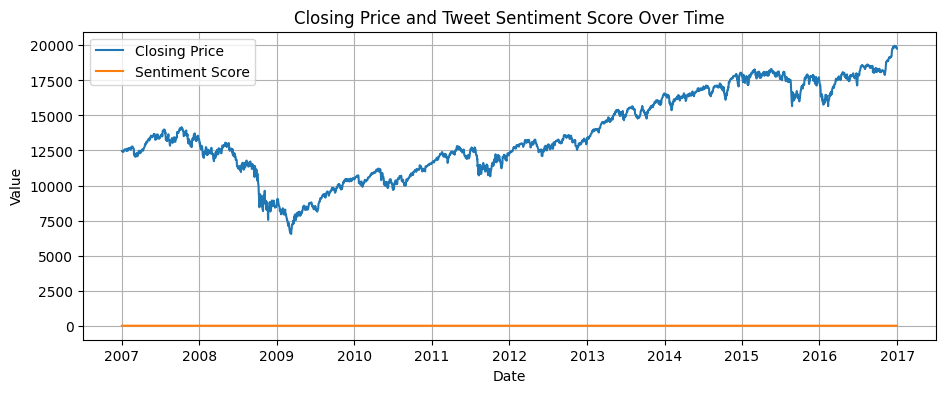

In [ ]:
plt.figure(figsize=(11, 4))

# Plotting Closing Price
sns.lineplot(data=structured_df, x='Date', y='closing_price', label='Closing Price')
# Plotting Sentiment Score
sns.lineplot(data=structured_df, x='Date', y='sentiment_score', label='Sentiment Score')
plt.title('Closing Price and Tweet Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

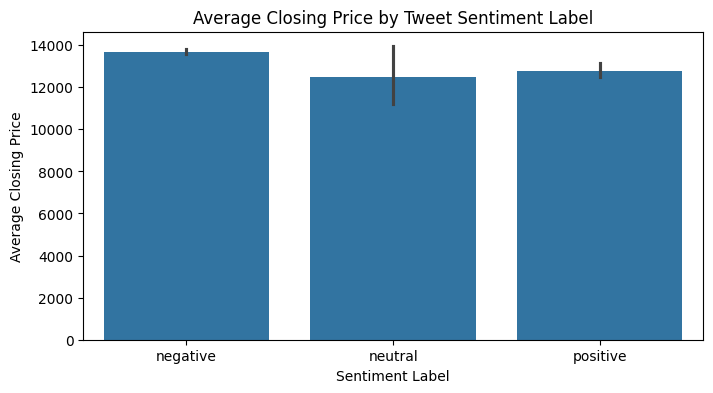

In [ ]:
# Visualize average closing price by sentiment label
plt.figure(figsize=(8, 4))
sns.barplot(x='sentiment_label', y='closing_price', data=structured_df)
plt.title('Average Closing Price by Tweet Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Closing Price')
plt.show()